In [ ]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Manipulation
import pandas as pd
import numpy as np

#Classification
import lightgbm as lgb

#Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV

#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# **Dataset Exploration**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart Disease/heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


- age - age
- sex -sex
- cp - chest pain type (4 values)
- trestbps - resting blood pressure
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl
- restecg - resting electrocardiographic results (values 0,1,2)
- thalach - maximum heart rate achieved
- exang - exercise induced angina
- oldpeak - oldpeak = ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target - The names and social security numbers of the patients were recently - removed from the database, replaced with dummy values.

**Check null values**

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Statistical Analysis**

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Find correlation between features**

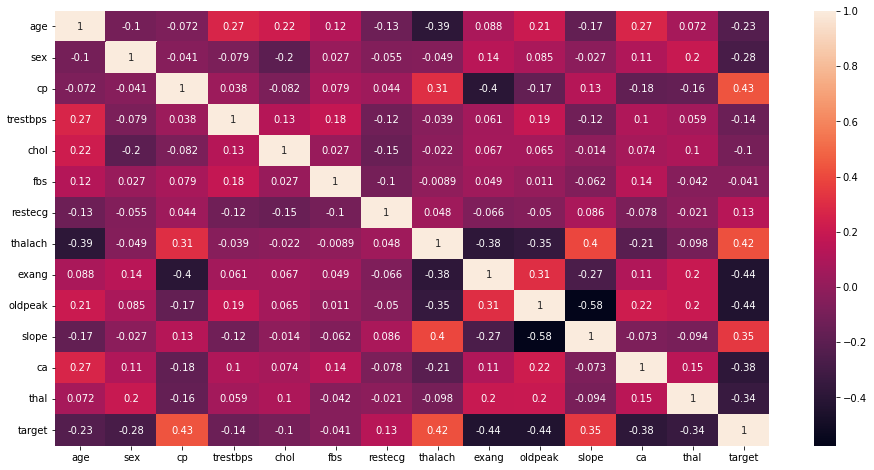

In [ ]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr, annot = True, ax = ax)

# **Univariate Analysis**

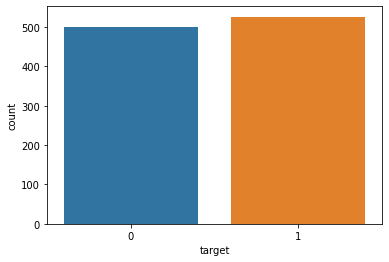

In [ ]:
sns.countplot(x = 'target', data = dataset)

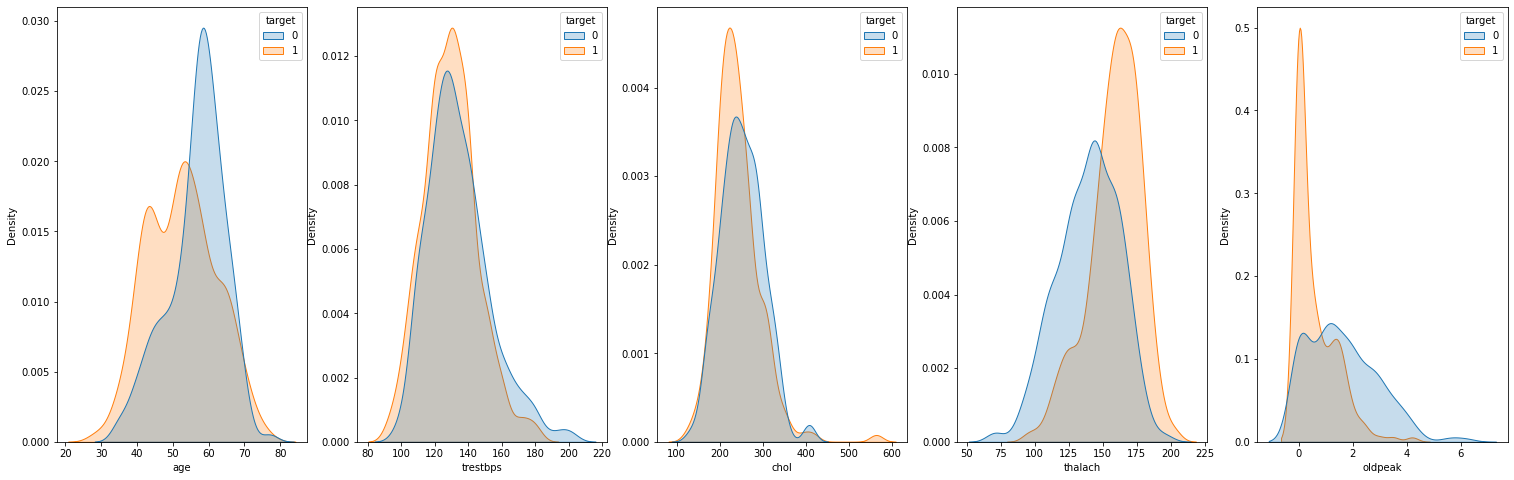

In [ ]:
fig, ax = plt.subplots(1,5, figsize = (26,8))
sns.kdeplot(x = 'age', hue = 'target', data = dataset, shade = True, ax = ax[0])
sns.kdeplot(x = 'trestbps', hue = 'target', data = dataset, shade = True, ax = ax[1])
sns.kdeplot(x = 'chol', hue = 'target', data = dataset, shade = True, ax = ax[2])
sns.kdeplot(x = 'thalach', hue = 'target', data = dataset, shade = True, ax = ax[3])
sns.kdeplot(x = 'oldpeak', hue = 'target', data = dataset, shade = True, ax = ax[4])

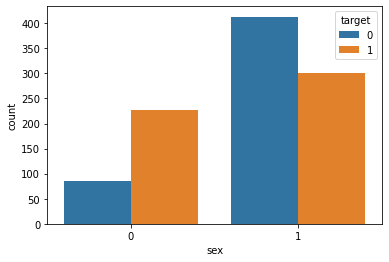

In [ ]:
sns.countplot(x = 'sex', hue = 'target', data = dataset)

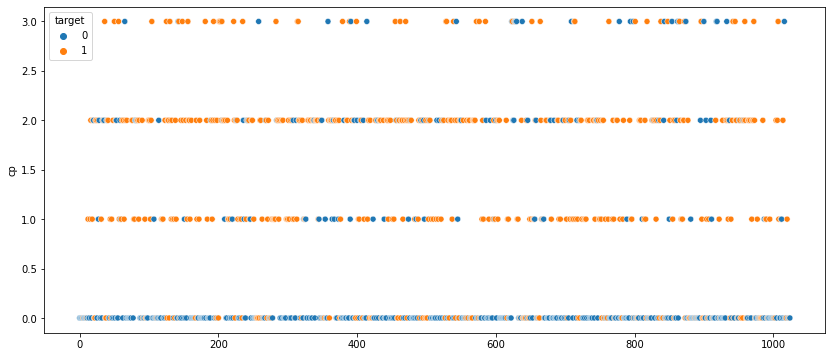

In [ ]:
plt.figure(figsize = (14, 6))
sns.scatterplot(x = dataset.index, y = 'cp', hue = 'target', data = dataset)

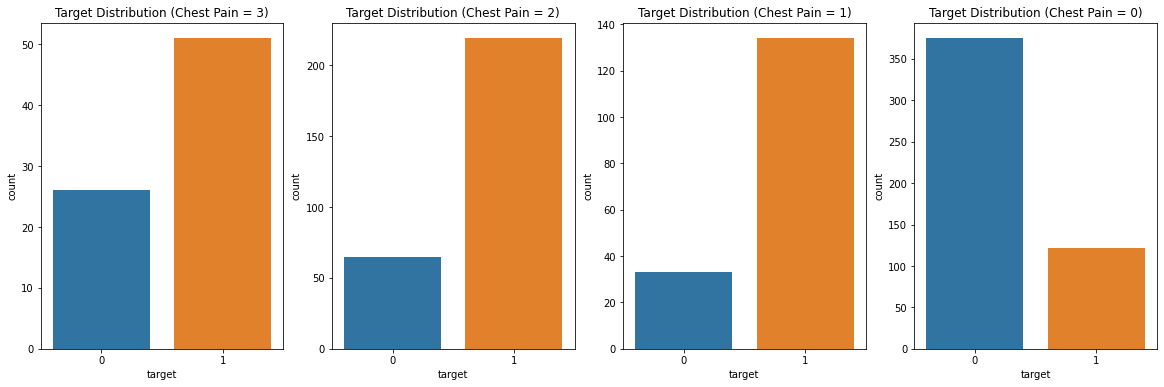

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (20,6))
ax[0].set_title("Target Distribution (Chest Pain = 3)")
sns.countplot(x = 'target', data = dataset[dataset['cp'] == 3], ax=ax[0])

ax[1].set_title("Target Distribution (Chest Pain = 2)")
sns.countplot(x = 'target', data = dataset[dataset['cp'] == 2], ax=ax[1])

ax[2].set_title("Target Distribution (Chest Pain = 1)")
sns.countplot(x = 'target', data = dataset[dataset['cp'] == 1], ax=ax[2])

ax[3].set_title("Target Distribution (Chest Pain = 0)")
sns.countplot(x = 'target', data = dataset[dataset['cp'] == 0], ax=ax[3])

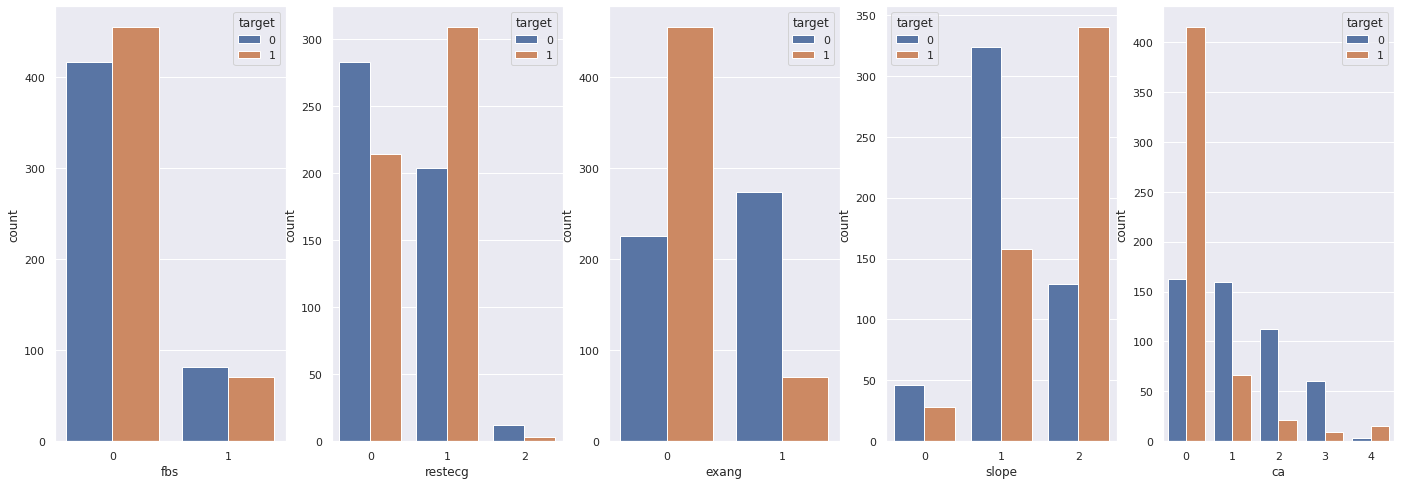

In [ ]:
fig, ax = plt.subplots(1,5, figsize = (24, 8))
sns.countplot(x = 'fbs', hue = 'target', data=dataset, ax=ax[0])
sns.countplot(x = 'restecg', hue = 'target', data=dataset, ax = ax[1])
sns.countplot(x = 'exang', hue = 'target', data=dataset, ax = ax[2])
sns.countplot(x = 'slope', hue = 'target', data=dataset, ax = ax[3])
sns.countplot(x = 'ca', hue = 'target', data=dataset, ax = ax[4])


# **Bivariate Analysis**

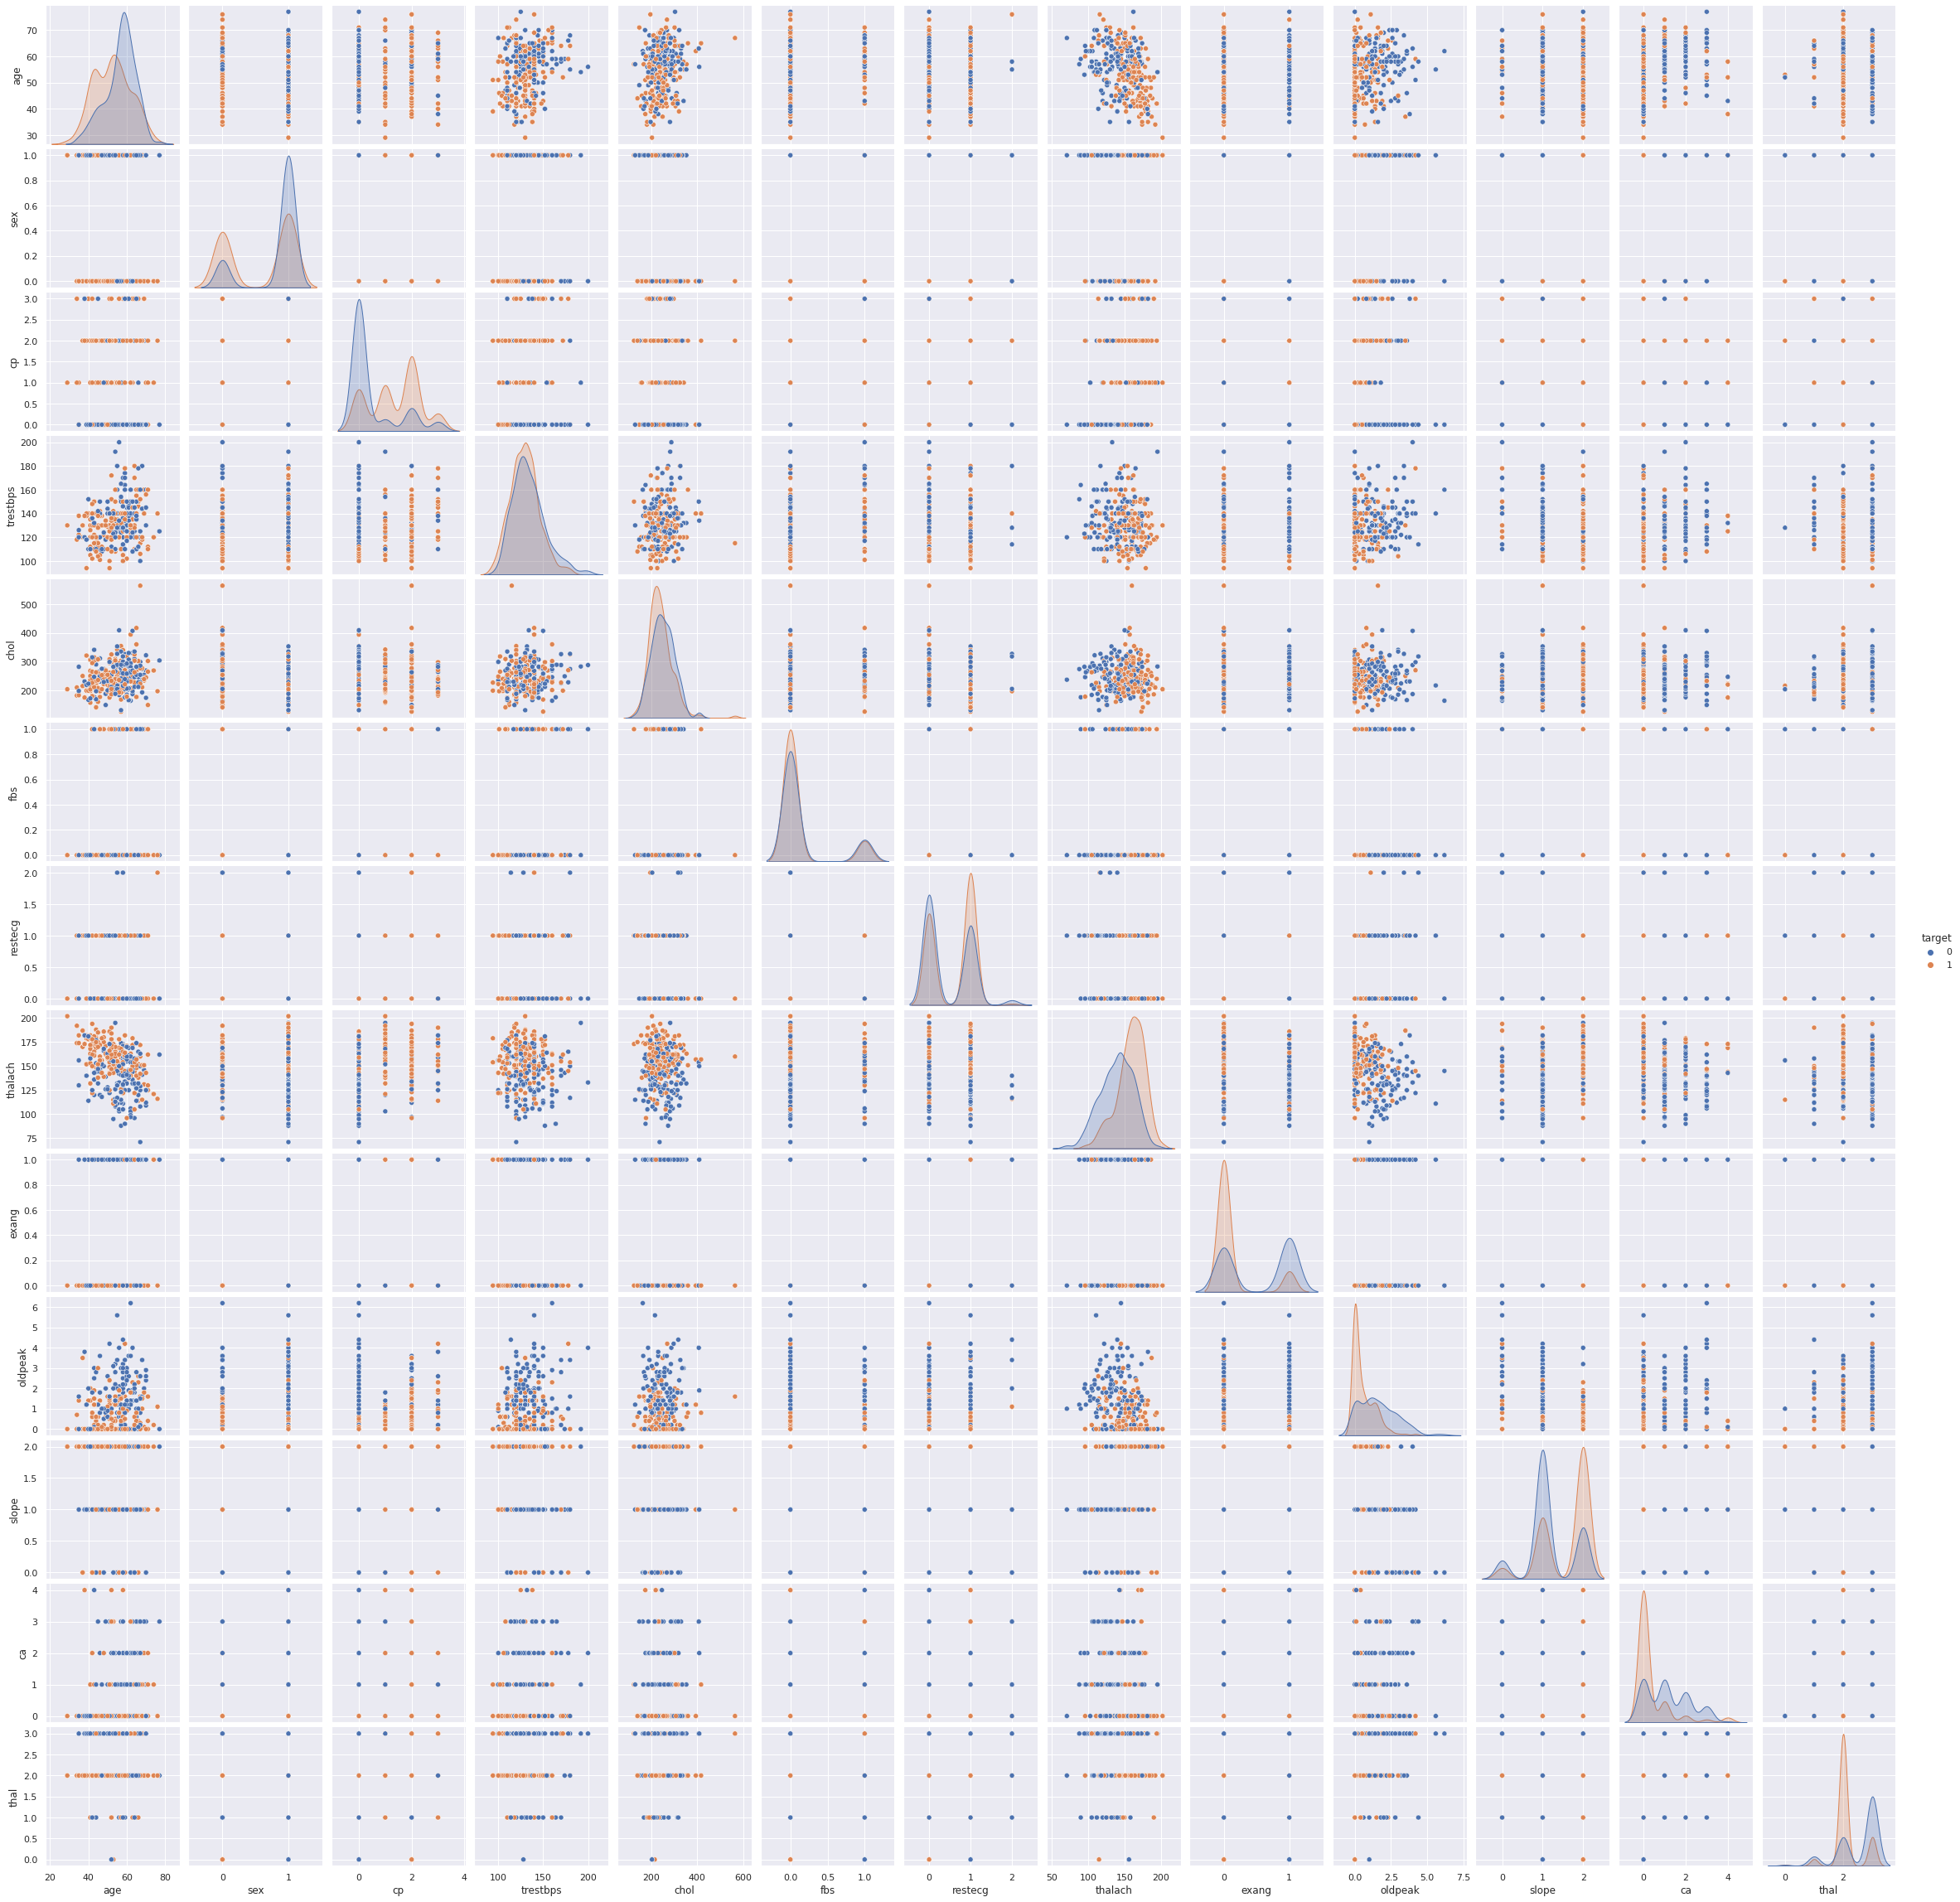

In [ ]:
sns.pairplot(data = dataset, hue = 'target')

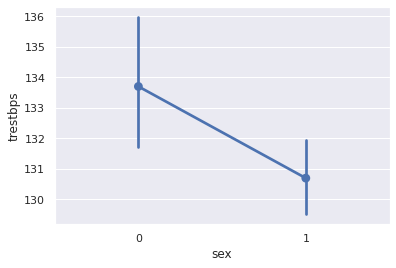

In [ ]:
sns.pointplot(x='sex', y='trestbps', data=dataset)

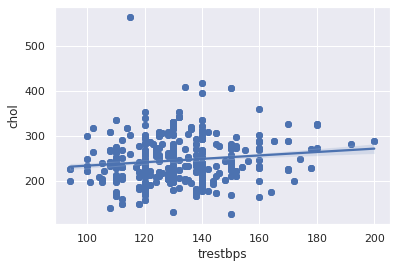

In [ ]:
sns.regplot(x = 'trestbps', y = 'chol', data= dataset)

# **Split The Dataset**

In [ ]:
X = dataset.drop('target', axis = 1).values
y = dataset['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape, X_test.shape)

(820, 13) (205, 13)


# **Fit LightGBM Model**

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

1.0